In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('product_table.csv')
df

,prod_id,prod_desc,prod_section,prod_category,prod_subcategory,prod_type,prod_mfc_brand_cd,prod_unit_qty_count,prod_count_uom,prod_uom_value
0,20000002,ACSE SS TUNA LT CHUNK IN BROTH,Grocery,Canned,Canned Fish/Meat,Canned Tuna,ACSE,1,KG,1.88
1,20000005,ACSE APPLE CIDER 3 LT,Produce,Hard Goods,Dressing/Dips/Juices,Juice,ACSE,1,L,3.00
2,20000069,ACSE WHOLE COD,Seafood,Fresh Seafood,Fresh Fish,Cod,ACSE,1,KG,1.00
3,20000086,S.S. SR. JUICE BERRIES,Bulk,Bulk Foods,Confectionary,Candy,SANB,1,UN,1.00
4,20000093,DANONE ACTIVIA CLUB PACK,Dairy,Yogurt/Refrigerated Juice,Yogurt,Health,DACT,24,G,100.00
...,...,...,...,...,...,...,...,...,...,...
154813,21363091002,WNW CI SHDW QUAD PETALETTE,Mass Cosmetics,Colour Cosmetics - Mass,Eye Colour,Eye Shadow,WNWI,1,G,4.80
154814,21364200002,WNW PHOTO FOCUS FDN BEIGE,Mass Cosmetics,Colour Cosmetics - Mass,Face & Body Colour,Foundation,WNWI,1,ML,30.00
154815,21364200003,WNW PHOTO FOCUS FDN SOFT IVORY,Mass Cosmetics,Colour Cosmetics - Mass,Face & Body Colour,Foundation,WNWI,1,ML,30.00
154816,21364220001,WNW ULT BROW RETRACT TAUPE,Mass Cosmetics,Colour Cosmetics - Mass,Eye Colour,Brow Products,WNWI,1,G,0.20


In [3]:
df['prod_desc']

0         ACSE SS TUNA LT CHUNK IN BROTH
1                  ACSE APPLE CIDER 3 LT
2                         ACSE WHOLE COD
3                 S.S. SR. JUICE BERRIES
4               DANONE ACTIVIA CLUB PACK
                       ...              
154813        WNW CI SHDW QUAD PETALETTE
154814         WNW PHOTO FOCUS FDN BEIGE
154815    WNW PHOTO FOCUS FDN SOFT IVORY
154816        WNW ULT BROW RETRACT TAUPE
154817      WNW DUAL END CNTR STK MD/TAN
Name: prod_desc, Length: 154818, dtype: object

In [4]:
#nltk.download('punkt')

In [5]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string


def clean_text_keep_nouns(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuation
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]
    # Tag parts of speech
    tagged = nltk.pos_tag(tokens)
    # Keep only nouns (NN for singular noun, NNS for plural noun, NNP for proper singular noun, NNPS for proper plural noun)
    nouns = [word for word, pos in tagged if pos in ["NN", "NNS", "NNP", "NNPS"]]
    # Join the list of nouns back into a string
    cleaned_text = " ".join(nouns)
    return cleaned_text

# Apply the cleaning function to the 'prod_desc' column
df['cleaned_desc'] = df['prod_desc'].apply(clean_text_keep_nouns)

# Tokenization
df['tokens'] = df['cleaned_desc'].apply(word_tokenize)

# Remove stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [item for item in x if item not in stop])

# Lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])

# Now df['lemmatized'] contains the cleaned, tokenized, and lemmatized text.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JMEI7\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JMEI7\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
df['lemmatized']

0         [acse, s, tuna, lt, chunk, broth]
1                  [acse, apple, cider, lt]
2                                     [cod]
3                            [juice, berry]
4             [danone, activia, club, pack]
                        ...                
154813     [wnw, ci, shdw, quad, petalette]
154814                [photo, focus, beige]
154815           [photo, focus, fdn, ivory]
154816     [wnw, ult, brow, retract, taupe]
154817                [wnw, end, cntr, stk]
Name: lemmatized, Length: 154818, dtype: object

In [7]:
from collections import Counter

# Flatten the list of lists
all_words = [word for tokens in df['lemmatized'] for word in tokens]
word_freq = Counter(all_words)

# Display the most common words
common_words = word_freq.most_common(20)
print(common_words)

[('acse', 24052), ('mini', 1528), ('choc', 1383), ('lip', 1381), ('c', 1376), ('bar', 1372), ('oil', 1241), ('w', 1212), ('tea', 1192), ('cream', 1162), ('chocolate', 1154), ('bag', 1109), ('chicken', 1063), ('nail', 1044), ('blue', 1036), ('b', 1036), ('beef', 1030), ('mix', 1017), ('jf', 989), ('gel', 972)]


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the tokens back into strings
df['lemmatized_joined'] = df['lemmatized'].apply(lambda x: ' '.join(x))

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_joined'])

# Get feature names to use as dataframe column headers
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [9]:
#nltk.download('averaged_perceptron_tagger')

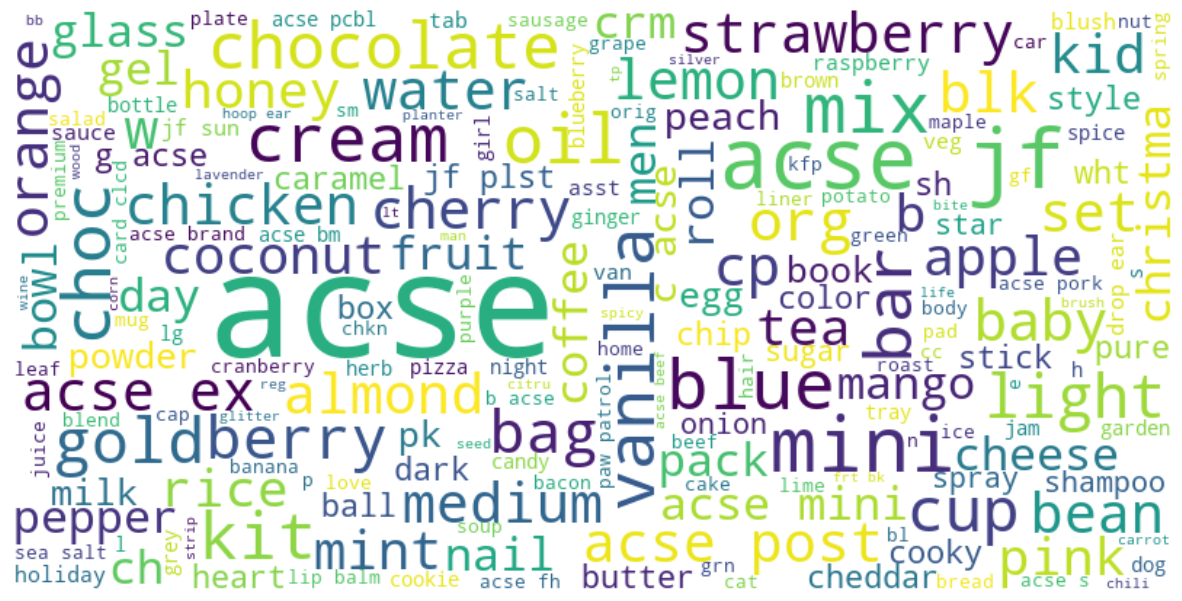

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate the word cloud data
wordcloud_data = ' '.join(df['lemmatized_joined'])

# Create a WordCloud instance
wordcloud = WordCloud(background_color='white', width=800, height=400, max_font_size=100, min_font_size=10).generate(wordcloud_data)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.show()

## Modeling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Assuming df is your DataFrame with the 'nouns_joined' and 'prod_category' columns

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['lemmatized_joined'], df['prod_category'], test_size=0.2, random_state=42)

# Create a machine learning pipeline that transforms the data using TfidfVectorizer and then fits a MultinomialNB classifier
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

C:\Users\JMEI7\AppData\Local\anaconda3_2\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                 precision    recall  f1-score   support

           3rd Party Gift Cards       1.00      0.07      0.13       126
                           Baby       0.90      0.61      0.73       460
                         Baking       0.67      0.58      0.62       624
                  Bath & Beauty       0.87      0.07      0.13       191
                           Beer       0.97      0.18      0.30       165
                      Breakfast       1.00      0.18      0.31       202
                     Bulk Foods       0.94      0.22      0.35       363
                         Canned       0.76      0.44      0.56       351
                 Cards And Wrap       0.82      0.52      0.63       478
        Cheese/Butter/Margarine       0.95      0.44      0.61       232
                 Cold Beverages       0.75      0.63      0.69       493
        Colour Cosmetics - Mass       0.55      0.96      0.70      1830
                     Commercial       0.95      0.

C:\Users\JMEI7\AppData\Local\anaconda3_2\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JMEI7\AppData\Local\anaconda3_2\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
product_name = 'acme wrench set'
predicted_category = model.predict([product_name])[0]
print(f"The predicted category for '{product_name}' is '{predicted_category}'")

The predicted category for 'acme wrench set' is 'Kitchen Prep'


In [22]:
from sklearn.metrics import classification_report
import pandas as pd
from io import StringIO

# Get the classification report as a string
report_str = classification_report(y_test, y_pred)

# Use pandas to read this report into a DataFrame. 
# The separator used in the report between columns is at least two spaces, hence '\s{2,}'
report_df = pd.read_csv(StringIO(report_str), sep=r'\s{2,}', engine='python', index_col=0)

# Convert 'f1-score' to float as it will be read as an object from the report
report_df['f1-score'] = report_df['f1-score'].astype(float)

# Now filter the DataFrame to find categories with an f1-score lower than 0.58
low_f1_categories = report_df[report_df['f1-score'] < 0.57]

# Display categories with f1-score lower than 0.57
print(low_f1_categories)

C:\Users\JMEI7\AppData\Local\anaconda3_2\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                      precision  recall  f1-score  support
3rd Party Gift Cards       1.00    0.07      0.13    126.0
Bath & Beauty              0.87    0.07      0.13    191.0
Beer                       0.97    0.18      0.30    165.0
Breakfast                  1.00    0.18      0.31    202.0
Bulk Foods                 0.94    0.22      0.35    363.0
...                         ...     ...       ...      ...
Supplies                   0.00    0.00      0.00      6.0
Sweet                      0.98    0.22      0.36    201.0
Toys                       0.93    0.34      0.50    459.0
Vegetables                 0.93    0.13      0.23    292.0
macro avg                  0.67    0.31      0.37  30964.0

[63 rows x 4 columns]


C:\Users\JMEI7\AppData\Local\anaconda3_2\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JMEI7\AppData\Local\anaconda3_2\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
import numpy as np
from collections import defaultdict
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a default dictionary to hold lists of keywords for each category
category_keywords = defaultdict(list)

# For each category, extract keywords using some logic; here's a placeholder for that logic
for category in df['prod_category'].unique():
    # Example: Select descriptions within the current category
    category_descriptions = df[df['prod_category'] == category]['lemmatized_joined']
    
    # Example logic for keyword extraction using TF-IDF
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(category_descriptions)
    feature_array = vectorizer.get_feature_names_out()
    tfidf_sorting = np.argsort(X.toarray()).flatten()[::-1]
    
    top_n = 3500  # Number of top keywords to extract
    top_keywords = feature_array[tfidf_sorting][:top_n]
    
    category_keywords[category].extend(top_keywords)

# Convert defaultdict to a regular dict if needed
category_keywords = dict(category_keywords)

# Display the category keywords
print(category_keywords)

{'Canned': ['mayo', 'ocean', 'tuna', 'zwan', 'grade', 'goreng', 'governor', 'goya', 'grace', 'gravy', 'goodman', 'grce', 'grdn', 'green', 'grg', 'grit', 'gor', 'gomtang', 'grn', 'goldseal', 'gold', 'glicks', 'glass', 'ginger', 'gin', 'giant', 'ghannouge', 'gg', 'gfs', 'gf', 'gel', 'gefn', 'grlc', 'grng', 'gefen', 'grocery', 'hmsk', 'hmmade', 'hlvs', 'hkry', 'hereford', 'herb', 'heirloom', 'heinz', 'heartymeal', 'hearty', 'heart', 'hbrt', 'haul', 'hash', 'harvest', 'harbor', 'hanamaruki', 'hamburger', 'ham', 'half', 'halal', 'haddar', 'habi', 'gumbo', 'gulong', 'gsea', 'ground', 'gefilte', 'gdrn', 'homestyle', 'fishlets', 'fisch', 'fillet', 'fiesta', 'field', 'ff', 'ferma', 'fcy', 'fc', 'fava', 'family', 'eye', 'ex', 'eur', 'engld', 'england', 'eng', 'eggplant', 'egg', 'edg', 'dynasty', 'dunn', 'dtooth', 'dsny', 'drain', 'dora', 'doo', 'dole', 'fish', 'flake', 'garnish', 'flat', 'garlic', 'garl', 'gardenway', 'gardennay', 'garden', 'galil', 'ga', 'ftsp', 'frzn', 'fry', 'fruit', 'frt', '

In [23]:
# Function to check if the lemmatized description matches the category keywords
def check_category_alignment(row):
    # Retrieve the keywords for the product's category
    keywords = set(category_keywords.get(row['prod_category'], []))
    # Tokenize the lemmatized description
    description_tokens = set(row['lemmatized_joined'].split())
    # Check for any common elements between description tokens and category keywords
    common_elements = description_tokens.intersection(keywords)
    # If there are no common keywords, flag this row as potentially misaligned
    return 0 if common_elements else 1

# Apply the function to each row in the DataFrame
df['misaligned_flag'] = df.apply(check_category_alignment, axis=1)

# Now, 'df' contains an extra column 'misaligned_flag' where 1 indicates a potential misalignment.


In [26]:
df[df['misaligned_flag']==1]

,prod_id,prod_desc,prod_section,prod_category,prod_subcategory,prod_type,prod_mfc_brand_cd,prod_unit_qty_count,prod_count_uom,prod_uom_value,cleaned_desc,tokens,lemmatized,lemmatized_joined,misaligned_flag
11,20000168,K049 - BLACK,Eyewear,Optical,Frames-Optical,Ladies,KINK,1,EA,1.00,,[],[],,1
20,20000321,OLIVIA,Entertainment,Reading,Books-Childrens,Babies & Preschool,UNGM,1,EA,1.00,olivia,[olivia],[olivia],olivia,1
53,20000879,CA DC72 BROWN,Eyewear,Optical,Frames-Optical,Ladies,00CA,1,EA,1.00,,[],[],,1
68,20001306,CONS REPORTS RATIN,Entertainment,Reading,Magazines,French,CMAG,1,EA,1.00,cons reports ratin,"[cons, reports, ratin]","[con, report, ratin]",con report ratin,1
106,20001888,OLYMPIC ORG YOGURT PLAIN,Natural Foods,Natural Foods,Dairy-Natural Foods,Yogurt,OPIC,1,KG,1.75,olympic plain,"[olympic, plain]","[olympic, plain]",olympic plain,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154657,21289083001,CGRL CLEAN FRESH PRESD PWD 160,Mass Cosmetics,Colour Cosmetics - Mass,Face & Body Colour,Powder,CGRL,1,G,10.00,presd pwd,"[presd, pwd]","[presd, pwd]",presd pwd,1
154658,21289083002,CGRL CLEAN FRESH PRESD PWD 140,Mass Cosmetics,Colour Cosmetics - Mass,Face & Body Colour,Powder,CGRL,1,G,10.00,presd pwd,"[presd, pwd]","[presd, pwd]",presd pwd,1
154659,21289083003,CGRL CLEAN FRESH PRESD PWD 100,Mass Cosmetics,Colour Cosmetics - Mass,Face & Body Colour,Powder,CGRL,1,G,10.00,presd pwd,"[presd, pwd]","[presd, pwd]",presd pwd,1
154718,21302029005,RML OMG PLUMP 1999,Mass Cosmetics,Colour Cosmetics - Mass,Lip Colour,Lip Gloss,RIML,1,EA,1.00,rml,[rml],[rml],rml,1


In [17]:
df['prod_desc']

0         ACSE SS TUNA LT CHUNK IN BROTH
1                  ACSE APPLE CIDER 3 LT
2                         ACSE WHOLE COD
3                 S.S. SR. JUICE BERRIES
4               DANONE ACTIVIA CLUB PACK
                       ...              
154813        WNW CI SHDW QUAD PETALETTE
154814         WNW PHOTO FOCUS FDN BEIGE
154815    WNW PHOTO FOCUS FDN SOFT IVORY
154816        WNW ULT BROW RETRACT TAUPE
154817      WNW DUAL END CNTR STK MD/TAN
Name: prod_desc, Length: 154818, dtype: object

In [18]:
# Use boolean indexing to filter rows
filtered_df = df[(df['lemmatized_joined'].str.contains('juice')) & (df['prod_category'] == 'Bulk Foods')]

# Display the filtered DataFrame
filtered_df

,prod_id,prod_desc,prod_section,prod_category,prod_subcategory,prod_type,prod_mfc_brand_cd,prod_unit_qty_count,prod_count_uom,prod_uom_value,cleaned_desc,tokens,lemmatized,lemmatized_joined,misaligned_flag
3,20000086,S.S. SR. JUICE BERRIES,Bulk,Bulk Foods,Confectionary,Candy,SANB,1,UN,1.0,juice berries,"[juice, berries]","[juice, berry]",juice berry,0
5202,20085097,FRUIT JUICE BERRIES,Bulk,Bulk Foods,Baking/Cooking,Baking Fruit,UNBR,1,G,225.0,fruit juice berries,"[fruit, juice, berries]","[fruit, juice, berry]",fruit juice berry,0
9188,20149179,GG SUPER JUICE BERRIES,Bulk,Bulk Foods,Confectionary,Candy,UNBR,10,UN,1.0,gg juice berries,"[gg, juice, berries]","[gg, juice, berry]",gg juice berry,0
97945,21168467,CDCD SOUR JACKED JUICE BERIS,Bulk,Bulk Foods,Confectionary,Candy,CDCD,1,KG,1.0,juice beris,"[juice, beris]","[juice, beris]",juice beris,0


In [27]:
df['prod_desc']

0         ACSE SS TUNA LT CHUNK IN BROTH
1                  ACSE APPLE CIDER 3 LT
2                         ACSE WHOLE COD
3                 S.S. SR. JUICE BERRIES
4               DANONE ACTIVIA CLUB PACK
                       ...              
154813        WNW CI SHDW QUAD PETALETTE
154814         WNW PHOTO FOCUS FDN BEIGE
154815    WNW PHOTO FOCUS FDN SOFT IVORY
154816        WNW ULT BROW RETRACT TAUPE
154817      WNW DUAL END CNTR STK MD/TAN
Name: prod_desc, Length: 154818, dtype: object